## Modificación de ejemplos vistos en clase

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [119]:
dataset = pd.read_csv('https://bit.ly/2lNwP85')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
X = dataset.iloc[:, [3,4]].values
Y = dataset.iloc[:, 3].values

In [136]:
def agnes(X, affinity, linkage):
    plt.figure(figsize=(12, 7))
    hc = AgglomerativeClustering(n_clusters=5, affinity=affinity, linkage=linkage)
    y_hc = hc.fit_predict(X)
    l1 = f'Cluster 1 {len(X[y_hc == 0, 1])}'
    l2 = f'Cluster 2 {len(X[y_hc == 1, 1])}'
    l3 = f'Cluster 3 {len(X[y_hc == 2, 1])}'
    l4 = f'Cluster 4 {len(X[y_hc == 3, 1])}'
    l5 = f'Cluster 5 {len(X[y_hc == 4, 1])}'
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label=l1)
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label=l2)
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label=l3)
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label=l4)
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label=l5)
    plt.title(f'Grupos de clientes - {affinity} : {linkage}')
    plt.xlabel('Ingreso anual (k$)')
    plt.ylabel('Nivel de consumo (1-100)')
    plt.legend()
    plt.show()

## AGNES - Comparación entre distancias Euclideana y Manhattan

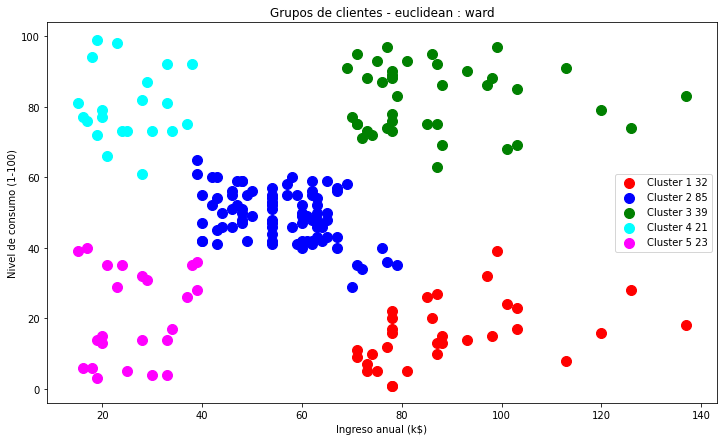

In [137]:
agnes(X, 'euclidean', 'ward')

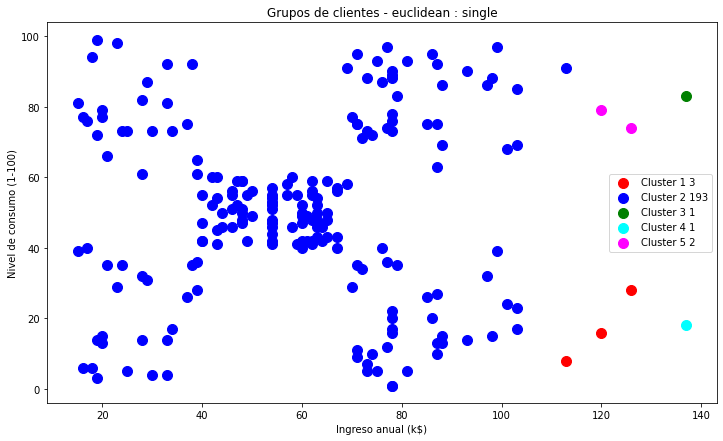

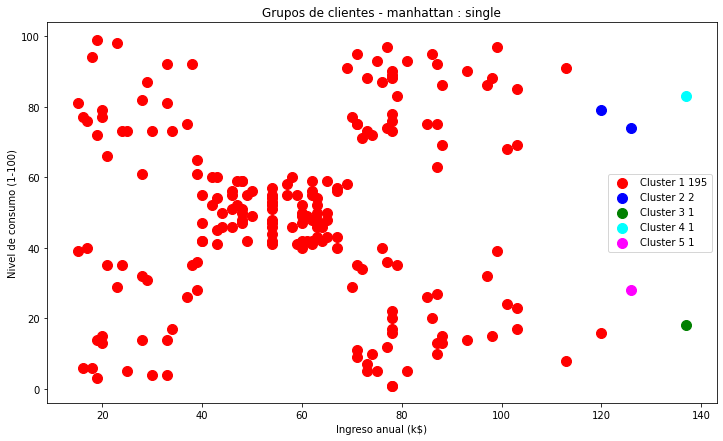

In [138]:
agnes(X, 'euclidean', 'single')
agnes(X, 'manhattan', 'single')

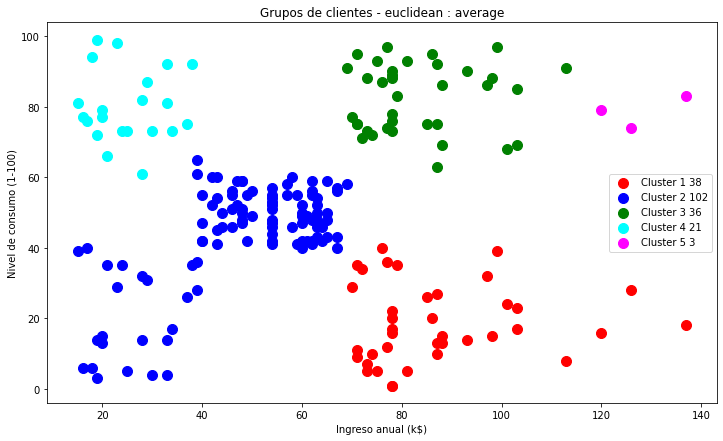

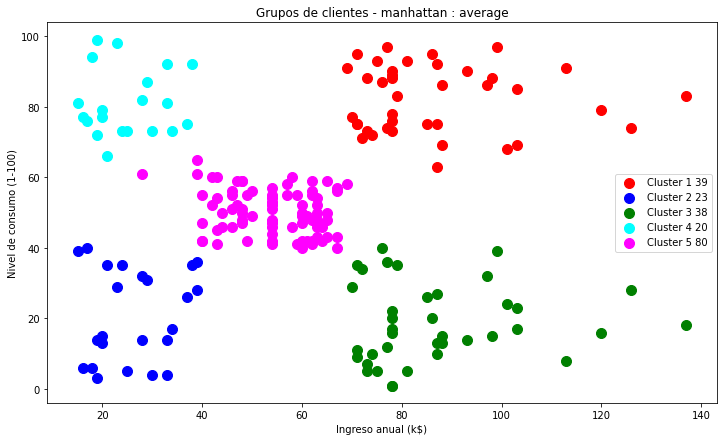

In [139]:
agnes(X, 'euclidean', 'average')
agnes(X, 'manhattan', 'average')

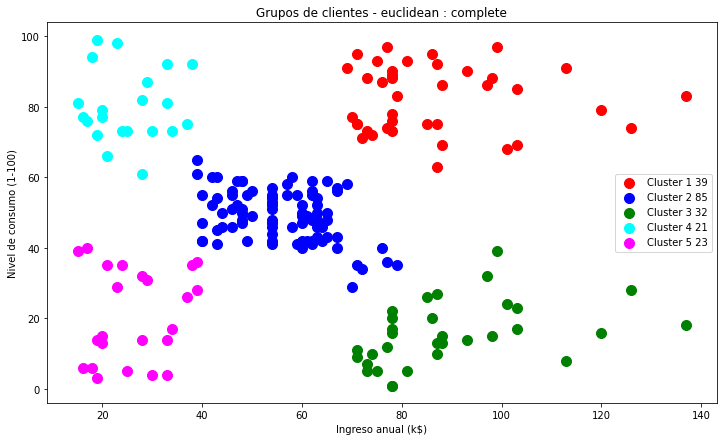

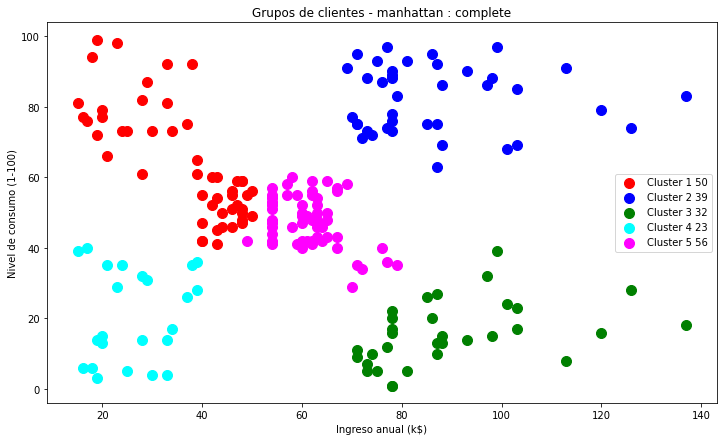

In [140]:
agnes(X, 'euclidean', 'complete')
agnes(X, 'manhattan', 'complete')

### Comparación de resultados

- *Euclidean Ward*: el método de Ward solo funciona para distancia Eucilideana pues toma como entrada la suma de los cuadrados obtenida con la distancia Eucilideana, cosa que no se puede obtener con la de Manhattan. Independientemente de esto, este método agrupa bastante equilibrado 
- *Eucildean/Manhattan - Single Linkage*: en estos scatter plots podemos ver que la agrupación es muy similar independientemente de la distancia que ocupemos. El *single linkage* es bueno para identificar outliers dentro de un conjunto de datos, aunque no es lo mejor si queremos agrupar de manera balanceada. En este caso podemos observar que la distancia que ocupemos no tiene mayor influencia sobre el resultado de agrupación. 
- *Eucildean/Manhattan - Average Linkage*: los que podemos observar es que la distancia Manhattan agrupa mejor usando un agrupamiento por promedio, mientras que la distancia Eucilideana agrupa en un cluster 102 elementos, lo cual es un agrupamiento más desbalanceado. Como veremos más abajo, el agrupamiento por promedio se apega más hacía un agrupamiento de manera simple (single linkage) en que agrupa en un cluster la mayoría de los datos y en los $n-1$ clusters restantes agrupa solo $1-2$ observaciones por cluster. Sin embargo, a pesar de este fenómeno podemos concluir que usar la distancia Manhattan junto con un enlazamiento promedio es una mejor opción pues los clusters que genera son mucho más balanceados
- *Eucildean/Manhattan - Complete Linkage*: usando un enlazamiento completo se toman distancias máximas entre los clústers, lo que provoca visualmente que la información quede mejor balanceada en un dendograma, por lo que podemos esperar, al igual que con un enlazamiento Ward, que las observaciones por cada clúster estén bien distribuidas entre los $5$ clusters. Sin embargo, al igual que con el enlazamiento promedio, la distancia Manhattan parece ofrecer valores más balanceados y mejor distribuidos. 

Siguiendo esta lógica de querer agrupar los datos de la mejor forma posible (es decir, siguiendo un número balanceado de observaciones entre clústers aunque no necesariamente los datos presenten esta distribución balanceada), según el número de observaciones entre cada clúster, el método que mejor rendimiento ofrece es una distancia Manhattan con un enlazamiento completo. 


## Dendogramas - diferentes tipos de distancia entre grupos

In [104]:
def plot_dendogram(method):
    plt.figure(figsize=(20, 15))
    bdendogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title(f'Dendogram - {method}')
    plt.xlabel('Clientes')
    plt.ylabel('Distancia euclideana')
    plt.show()

8


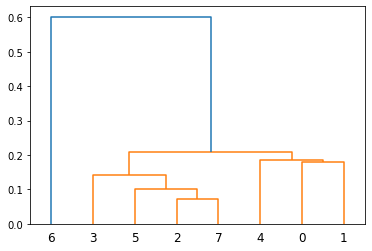

In [8]:
x = np.array([[0.40, 0.53], [0.22, 0.53], [0.35, 0.32], [0.26, 0.19], 
              [0.08, 0.41], [0.45, 0.3], [0.8, 0.98], [0.28, 0.33]])
print(len(x))
d = sch.dendrogram(sch.linkage(x, method='single'))

#[6, 
# [[3, [5, [2, 7]]], [4, [0, 1]]]
# ]

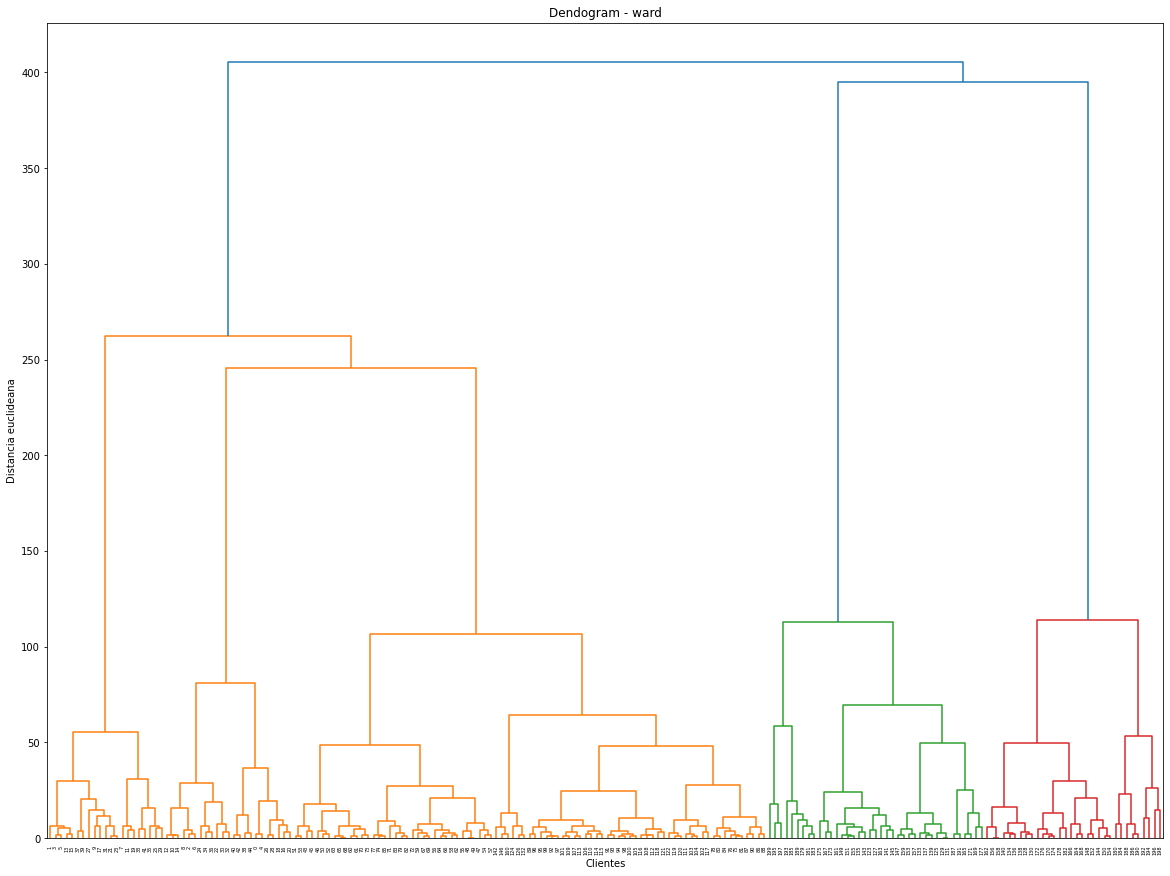

In [105]:
plot_dendogram('ward')

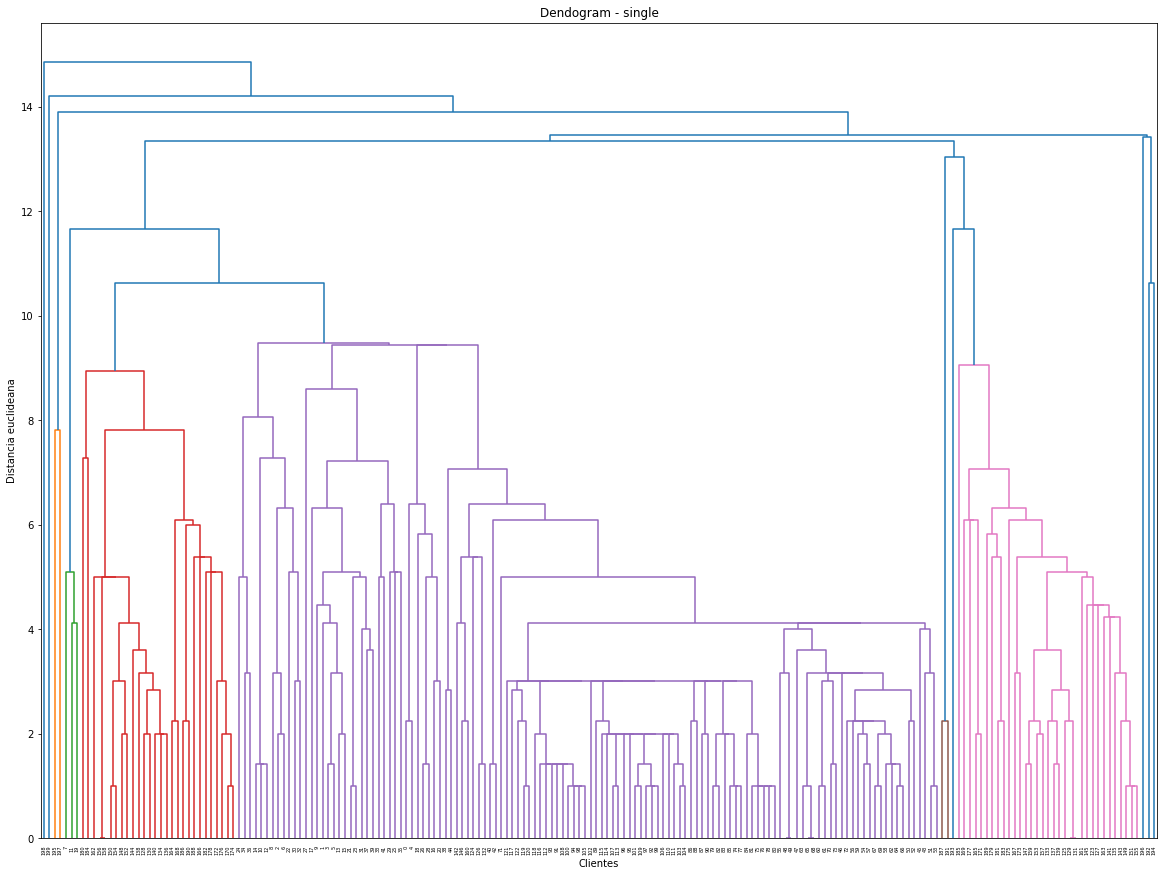

In [106]:
plot_dendogram('single')

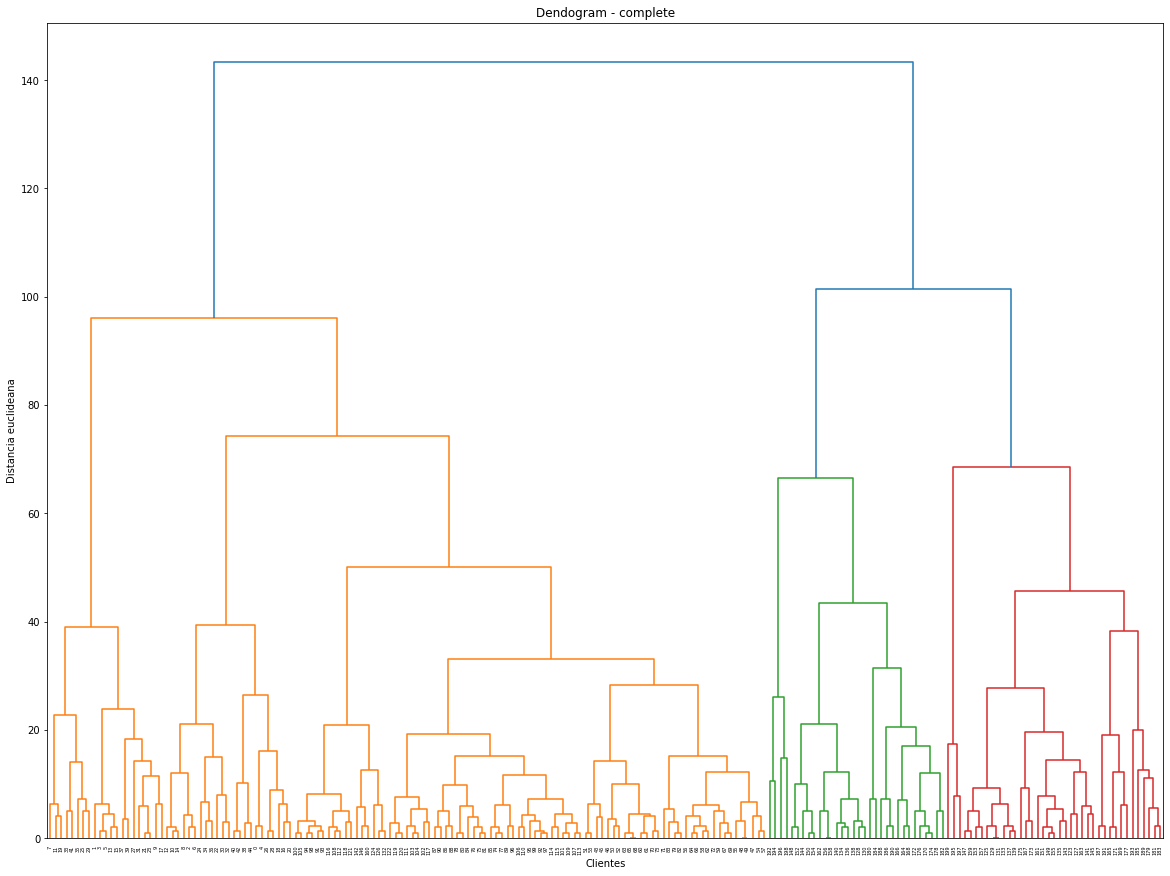

In [107]:
plot_dendogram('complete')

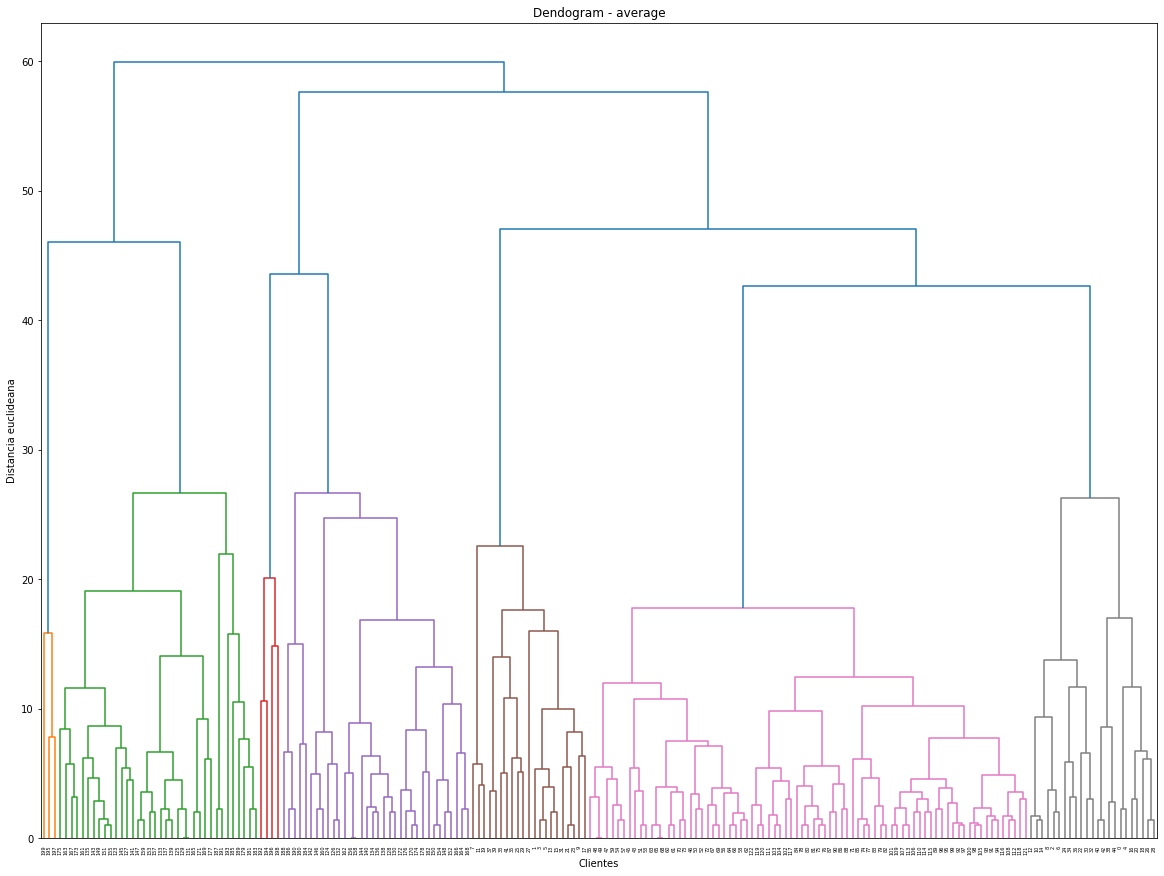

In [108]:
plot_dendogram('average')

### Comparación de resultados

- *Single linkage*: en este método se obtiene, entre dos clústers, la distancia mínima entre los puntos más cercanos entre ambos. Lo que significa esto, visualmente, es que el dendograma no quede muy bien centrado pues localmente va agrupando por distancias mínimas. Posteriormente lo que hace es buscar el siguiente vecino más cercano y lo agrupa en otro clúster. 

- *Complete linkage*: en este método lo que se hace es calcular la distancia máxima, es decir, la distancia entre dos clústers está definida como los vecino más alejados. A la hora de juntar, lo que se hace es agrupar aquellos vecinos más cercanos. Lo que refleja esto visualmente es un dendograma que se ve balanceado pues las distancias entre clusters es máxima. 

- *Average linkage*: la distancia entre dos clusters será la distancia promedio entre todas las distancias de cada elemento del cluster $A$ y $B$. Es decir, considera todos los elementos de un cluster dado. Este método es uno intermedio entre *single* y *complete*; sin embargo, la representación visual que obtenemos es más similar a *complete*. 

- *Ward linkage*: este último método de los 4 más populares, de entrada, podemos observar que el dendograma tiene estructura más diferentes a los 3 anteriores. Esto se debe a que los tres métodos anteriores solo necesitan de una matriz de distancias entre los clústers; sin embargo, el método desarrollado por Ward se basa en la suma de los errores cuadŕaticos por lo que solo funciona para la distancia Euclideana; aunado a esto, éste método requiere de un centroide por cada cluster (vector media de todas las observaciones de un cluster determinado). Concretamente, lo que podemos observar del dendograma y de la teoría, éste método lo que intenta hacer es minimizar las variaciones que ocurren al agrupar clústers.

Como conclusión final, podemos observar que los mejores métodos para agrupar clústers de información son los métodos de *Ward* y *Complete* pues ambos nos generan una agrupación mejor balanceada (se puede verificar con los dendogramas), sin embargo, la ventaja de ocupar *Single* o *Average* es que ambos nos identificarán a los outliers del conjunto de datos. La desventaja de estos últimos es que agruparan muchos datos en un solo cluster y tendran pocos clusters con solo un dato. 